# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [6]:
#import modules and load csv file
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('data/human_body_temperature.csv')

### 1. Is the distribution of body temperatures normal? 
A histogram can be used to observe the distribution of the body temperature. To do so, we use matplotlib to generate a histogram with the dataframe from 'data/human_body_temperature.csv'.

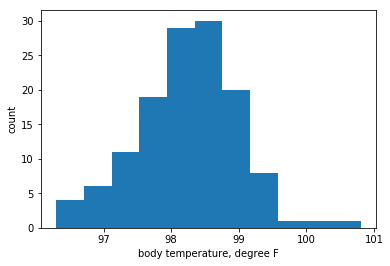

In [7]:
#create a bin size of the square root of the data size.
bin_size = int(np.sqrt(130))

#generate the histogram with calculated bins
_ = plt.hist(df['temperature'], bins=bin_size)
_ = plt.xlabel('body temperature, degree F')
_ = plt.ylabel('count')
plt.show()

The distribution of the body temperature in the observed data is somewhat normally distributed with a mean close to 98.2 degrees F.

### 2. Is the sample size large? Are the observations independent?
The sample size of 130 is fairly large. The sample size is greater than 30, which is more than enough to conduct z-statistics with assuming the sample variance as the population variance. The observations are independent, the observation of one person's body temperature does not affect the observation of another person.

### 3. Is the true population mean really 98.6 degrees F?
Since the question is asking whether the population mean is really 98.6 degrees F, an one-sample test is used to compare the dataset with the assumed population mean of 98.6. The sample size is large enough to perform a z-test. In the situation of unknown population variance, we can assume the population variance to be the same as the sample variance.

In the z-test, the null hypothesis is that the sample mean and population mean are equal. The significance level of the test is 95%, which means alpha is 0.05. Assuming alpha is 0.05 and two-tailed test, the critical values would be -1.96 and 1.96.

In [26]:
#calculate sample mean
sample_mean = np.mean(df['temperature'])
sample_mean

98.24923076923078

In [27]:
#calculate sample standard deviation(std)
sample_std = np.std(df['temperature'])
sample_std

0.7303577789050377

In [10]:
#z-statistic equals (X - μ)/σ, we are substituting population std with sample std as s/(n**0.5).
# it can also be represented as (sample mean - population mean)/population std / square root of sample size.
z_stats = (98.24923076923078 - 98.6)/(0.7303577789050377/(130**0.5)) #we used sample std instead of population std
z_stats

-5.475925202078116

The test statistic is way beyond the critical value of the hypothesis. Therefore we reject the null hypothesis and conclude that the true population mean is not 98.6 degrees F.

Next, the same hypothesis would be used for t-test.

At 95% confidence, the critical values for t-statistics with more than 100 degrees of freedom would be -1.984 and 1.984.

In [12]:
#t-statistic equals (X - μ)/(s/n^0.5)
# it can also be represented as (sample mean - population mean)/(sample std / square root of sample size)
t_stats = (98.24923076923078 - 98.6)/(0.7303577789050377/(130**0.5))
t_stats

-5.475925202078116

The result of the t-statistic is also outside of the bound of the critical values, therefore the null hypothesis is rejected. We conclude that the true population mean is not 98.6 degrees F with both z-test and t-test with sample size of 130.

### 3. Draw a small sample of size 10 from the data and repeat both tests.

In [14]:
#gather 10 random samples from the data
small_sample = np.random.choice(df['temperature'], size = 10)
small_sample

array([  98.3,   98.1,   98. ,   98.8,   98.4,   98.2,   97.5,   98.9,
        100. ,   98.2])

In [15]:
#obtain mean of small_sample as mean_small
mean_small = np.mean(small_sample)
mean_small

98.440000000000012

In [19]:
#obtain sample standard deviation of small_sample as std_small
std_small = np.std(small_sample)
std_small

0.64062469512187903

The null hypothesis is population mean is 98.6, and the critical values for z-test at 95% confidence are -1.96 and 1.96.

In [20]:
#z-statistic equals (X - μ)/σ, we are substituting sample std again for population std as s/(n**0.5).
z_stats_small = (98.440000000000012 - 98.6)/(0.64062469512187903/(10**0.5))
z_stats_small

-0.7897985036787024

The null hypothesis is population mean is 98.6, and the critical values for z-test at 95% confidence with 9 degree of freedom are -2.262 and 2.262.

In [21]:
#t-statistic equals (X - μ)/(s/n^0.5)
t_stats_small = (98.440000000000012 - 98.6)/(0.64062469512187903/(10**0.5))
t_stats_small

-0.7897985036787024

We are not rejecting the null hypothesis in both tests because the test statistics is within the critical values in both tests.

When sample size gets smaller, the sample variance is not as small as sample variance from dataset with large sample size. In this case, the null hypothesis is not rejected in both tests. T-test should be used when sample size is small instead of z-test, because it is unreliable to substitute population variance with sample variance when sample size is too small. However, in the tests above, no apparent difference is observed between the results of both tests.

### 5. At what temperature should we consider someone's temperature to be "abnormal"?

Confidence interval can be used to determine whether some body temperature observations are considered abnormal. We can set the confidence interval at 99%, which means we assume the body temperature within the 99% confidence interval are considered normal. Whereas the body temperature outside of the 99% interval would be deemed abnormal.

At 99% confidence interval, the lower and upper ranges are ±2.576 standard deviations away from the sample mean. In this term, the standard deviation can be estimated as (s/n^0.5).

The margin of error would be the range between the sample mean and the limits of the confidence interval. In this situation, it is 2.576 standard deviations.

In [28]:
#calculate (s/n^0.5).
std_estimate = sample_std / 130**0.5
std_estimate

0.06405661469519336

In [30]:
#calculate the upper limit of the confidence interval as 2.576(s/n^0.5) + sample mean
upper = 2.576 * std_estimate + sample_mean
upper

98.4142406086856

In [31]:
#calculate the lower limit of the confidence interval as -2.576(s/n^0.5) + sample mean
lower = -2.576 * std_estimate + sample_mean
lower

98.08422092977595

In [33]:
#calculate margin of error as 2.576 * std_estimate
marg_error = 2.576 * std_estimate
marg_error

0.1650098394548181

The confidence interval of the normal body temperature at 99% is between 98.41 and 98.08 degrees F. And the margin of error would be 0.17 degrees F.

### 6. Is there a significant difference between males and females in normal temperature?

A permutation test is excellent for testing the difference between two populations. In this problem, we will filter each part of the dataframe by male and female. Next, we will create a few functions to perform the permutation test. Last, we will replicate the permutation by 10000 reps and compare the replicates to the actual difference of means from the sample data to obtain a p-value.

The null hypothesis would be no difference between genders in normal body temperature.

In [39]:
##filter the dataframe by male
male = df[df.gender == 'M']

In [41]:
##filter the dataframe by female
female = df[df.gender == 'F']

In [34]:
##define function that returns the difference of two means
def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""

    # The difference of means of data_1, data_2: diff
    diff = np.mean(data_1)-np.mean(data_2)

    return diff

##define permutation function
def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""

    # Concatenate the data sets: data
    data = np.concatenate((data1,data2))

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2

##define permutation replicates with function argument that we can fit in diff_of_means
def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1,data_2)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1,perm_sample_2)

    return perm_replicates

In [55]:
##calculate the difference in mean of body temperature between two genders
data_diff_means = diff_of_means(male['temperature'], female['temperature'])
print(data_diff_means)

-0.289230769230727


From the sample data, we can see that on average, women have slightly higher body temperature than men. Next, we will set the p-value equation to find the likeliness that permutation replicates would have as much as of a difference in the mean of body temperature.

In [51]:
perm_data = draw_perm_reps(male['temperature'], female['temperature'], diff_of_means, 10000)

In [54]:
p_value = np.sum(perm_data <= data_diff_means) / 10000
p_value

0.0135

The p-value shows that there is only 1.35% chance that the difference of average body temperatures between genders would be as large as observed, which is very unlikely. Therefore we can reject the null hypothesis and assume that there is a significant difference between male and female in normal body temperature.